In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [239]:
covid_url = (
    "https://www.data.gouv.fr/fr/datasets/r/0b66ca39-1623-4d9c-83ad-5434b7f9e2a4"
)

In [240]:
df = pd.read_csv(covid_url, sep=",", usecols=['date','granularite', 'maille_nom', 'cas_confirmes', 'source_type'], parse_dates=['date'])


In [241]:
print(list(df.columns))

['date', 'granularite', 'maille_nom', 'cas_confirmes', 'source_type']


In [242]:
data_top = df.head()
data_top

,date,granularite,maille_nom,cas_confirmes,source_type
0,2020-01-24,departement,Charente,0.0,agences-regionales-sante
1,2020-01-24,departement,Charente-Maritime,0.0,agences-regionales-sante
2,2020-01-24,departement,Corrèze,0.0,agences-regionales-sante
3,2020-01-24,departement,Creuse,0.0,agences-regionales-sante
4,2020-01-24,departement,Dordogne,0.0,agences-regionales-sante


In [251]:
countries_and_confirmed_more100 = np.logical_and(np.logical_and(df["granularite"] == "pays", df["cas_confirmes"].notna()), df["cas_confirmes"]> 100)
source_type_filter = df["source_type"]=="ministere-sante"
np.logical_and(countries_and_confirmed_more100, source_type_filter)
data_national = df.loc[countries_and_confirmed_more100,["date","maille_nom","cas_confirmes", "source_type"]]
data_national = data_national.drop_duplicates('date',keep='first')

data_national


,date,maille_nom,cas_confirmes,source_type
245,2020-03-01,France,130.0,ministere-sante
270,2020-03-02,France,178.0,sante-publique-france
326,2020-03-03,France,212.0,sante-publique-france
410,2020-03-04,France,285.0,sante-publique-france
507,2020-03-05,France,423.0,sante-publique-france
631,2020-03-06,France,613.0,sante-publique-france
740,2020-03-07,France,949.0,sante-publique-france
859,2020-03-08,France,1126.0,sante-publique-france
961,2020-03-09,France,1412.0,sante-publique-france
1079,2020-03-10,France,1784.0,sante-publique-france


In [252]:
cases = np.array((list(data_national["cas_confirmes"])))
dates = list(data_national["date"])
new_cases = cases[1:] - cases[:-1]
new_cases = np.insert(new_cases, 0, cases[0])

In [253]:
data_national.head()

,date,maille_nom,cas_confirmes,source_type
245,2020-03-01,France,130.0,ministere-sante
270,2020-03-02,France,178.0,sante-publique-france
326,2020-03-03,France,212.0,sante-publique-france
410,2020-03-04,France,285.0,sante-publique-france
507,2020-03-05,France,423.0,sante-publique-france


In [254]:
# Ajouter les nouveaux cas confirmes
cpt = 0
for lab, row in data_national.iterrows():
    data_national.loc[lab, "nouveaux_cas_confirmes"] = new_cases[cpt]
    cpt+=1

(array([737484., 737485., 737489., 737493., 737497., 737501., 737505.,
        737509., 737513., 737516., 737520.]),
 <a list of 11 Text major ticklabel objects>)

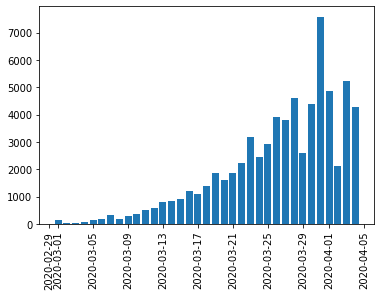

In [256]:
dfig, ax = plt.subplots()
data_national.set_index('date',inplace=True)
#data_national.plot(ax=ax)
#data_national.plot(kind='bar', ax=ax)
ax.bar(data_national.index, data_national["nouveaux_cas_confirmes"])
plt.xticks(rotation=90)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#plt.show()